# Predicting Home Sale Prices in Ames, Iowa
### A Multiple Linear Regression Analysis

## Summary
This analysis predicts home sale prices in Ames, Iowa using multiple linear regression. 
The final log-transformed model explains 81% of price variance using three features: 
overall quality, living area, and year built.

# Loading Packages and Reading CSV

In [1]:

# -*- coding: utf-8 -*-
"""
@author: sam.davison
"""
# 'https://jse.amstat.org/v19n3/decock/DataDocumentation.txt

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pathlib import Path


DATA_PATH = Path("../data/AmesHousing.csv")  # if notebook is in /notebooks
df = pd.read_csv(DATA_PATH)

# Exploratory Analysis - Missing Data and Medians

In [2]:
# df.shape          # how many rows/columns
# df.dtypes         # numeric vs categorical
# df.head()
# df.describe()     # summary stats for numeric
# df.info()         


median_sale_price = df['SalePrice'].median()
print("Median Sale Price:",median_sale_price)
median_living_area = df['Gr Liv Area'].median()
print("Median Living Area:",median_living_area)

missing = df.isnull().sum()
print(missing[missing > 0].sort_values(ascending=False))
df['Price_Per_SqFt'] = df['SalePrice'] / df['Gr Liv Area']

#Identifying variables most-correlated with sale price.
#Quality and 
#print(df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)

Median Sale Price: 160000.0
Median Living Area: 1442.0
Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Qual        159
Garage Cond        159
Garage Yr Blt      159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
Bsmt Qual           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
BsmtFin SF 1         1
BsmtFin SF 2         1
Electrical           1
Total Bsmt SF        1
Bsmt Unf SF          1
Garage Area          1
Garage Cars          1
dtype: int64


# Distribution of House Prices

Text(0.5, 1.0, 'Distribution of Sale Price')

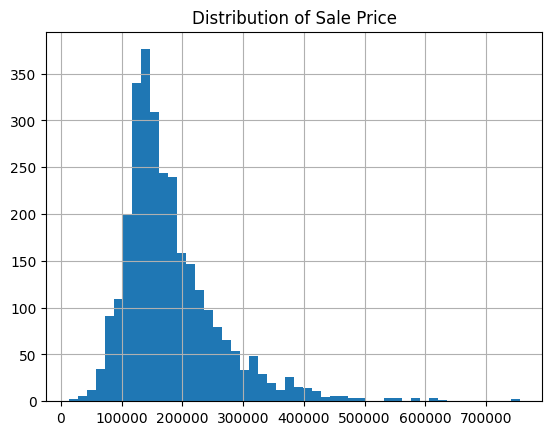

In [3]:
#Checking target variable for normal distribution
df['SalePrice'].hist(bins=50)
plt.title('Distribution of Sale Price')

# Sale Price & Living Area (Sq ft.)

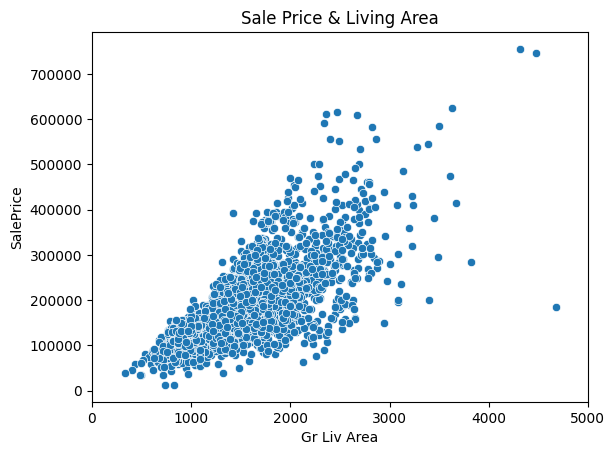

In [4]:
plt.figure()
sqft_corr = sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df) 
sqft_corr.set(xlim=(0, 5000))
plt.title("Sale Price & Living Area")


#removing outliers
df = df[df['Gr Liv Area'] <= 4000]

# Sale Price & Living Area (Sq ft.) (Large Homes Removed)

Text(0.5, 1.0, 'Sale Price & Living Area - Outliers Removed')

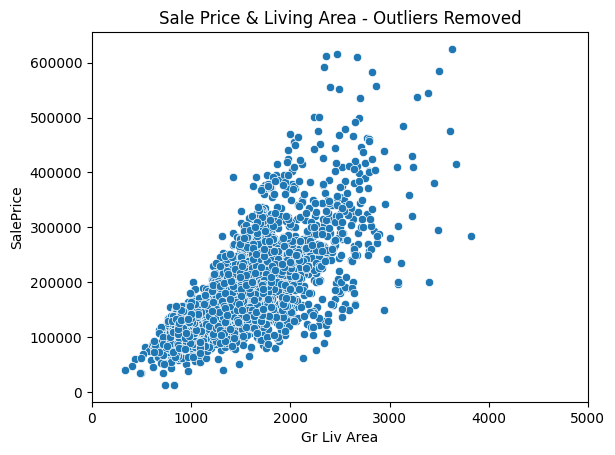

In [5]:
plt.figure()
sqft_corr_adj = sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df) 
sqft_corr_adj.set(xlim=(0, 5000))
plt.title("Sale Price & Living Area - Outliers Removed")

# Sale Price & Quality

[(0.0, 10.5)]

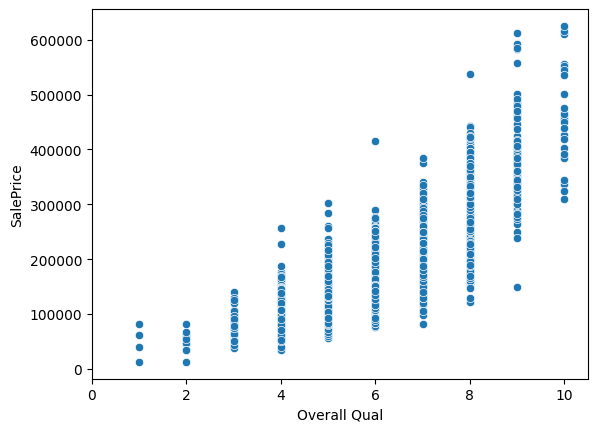

In [6]:

plt.figure()
qual_corr = sns.scatterplot(x='Overall Qual', y='SalePrice', data=df) 
qual_corr.set(xlim=(0, 10.5))



Clear upward trend with quality, no surprises.

In [7]:
X = df[['Overall Qual', 'Gr Liv Area']] 
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4) 

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred = lin_model.predict(X_test)

# Normality of residuals check - QQ


Text(0.5, 1.0, 'Q-Q Plot of Residuals')

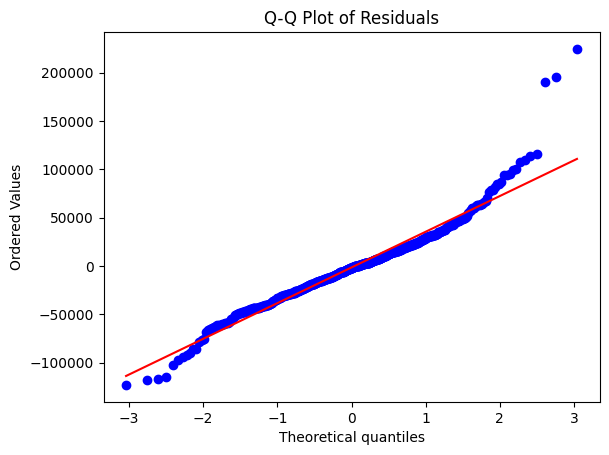

In [8]:
residuals = y_test - y_pred
plt.figure()
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
#A few outliers present towards teh upper end of the range.
#Log-transformation could help, as would removal of these 3 points.
#Otherwise, pretty health. 

A few outliers present towards the upper end of the range. Log-transformation could help, as would removal of these 3 points. Otherwise, pretty healthy. 

# Heteroscedasticity Check - Multiple Regression

Text(0.5, 1.0, 'Residuals vs Predicted (Heteroscedasticity Check)')

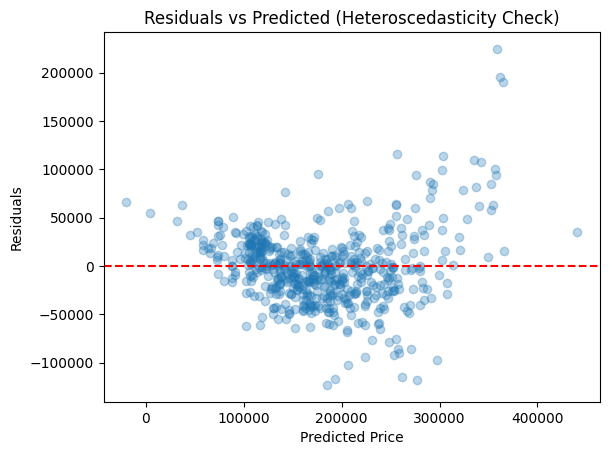

In [9]:

plt.figure()
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted (Heteroscedasticity Check)')


This plot does not appear to be totally random. Generally, higher house prices have higher deviations from our predictions. One way to interpret, is that high price houses are valued for more than quality or square footage. Could consider log-transformation to normalize.

# Collinearity Test

In [10]:
X_with_const = X_train.copy()
X_with_const['const'] = 1

for i, col in enumerate(X_with_const.columns):
    print(f'{col} VIF: {variance_inflation_factor(X_with_const.values, i):.2f}')


Overall Qual VIF: 1.48
Gr Liv Area VIF: 1.48
const VIF: 20.08


Both predictive variables have VIF's under 5, which means they are not strongly correlated with one another

# Actual vs. Predicted Sale Price

Text(0.5, 1.0, 'Actual vs Predicted Sale Price')

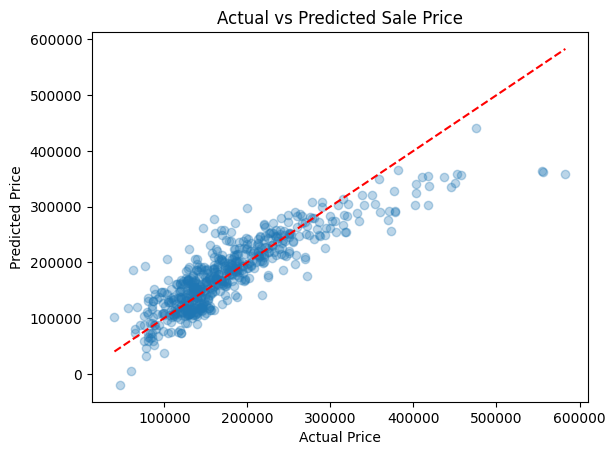

In [11]:
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Sale Price')

# Multiple Linear Regression Summary Statistics


In [12]:
print("R\u00b2",r2_score(y_test,y_pred))
print('\nCoefficients:')
print(f'  Overall Qual: ${lin_model.coef_[0]:,.2f} per unit increase')
print(f'  Gr Liv Area:  ${lin_model.coef_[1]:,.2f} per sqft increase')
print(f'  Intercept:    ${lin_model.intercept_:,.2f}')


R² 0.765478641888247

Coefficients:
  Overall Qual: $32,348.01 per unit increase
  Gr Liv Area:  $62.95 per sqft increase
  Intercept:    $-110,281.18


# Interpretation

R² = 0.765 - Approximately 77% of the variation in home price is explained by living area and overall quality.

Our coefficient for Quality is 32,348.01. This can be interpreted as the expected dollar amount gain for each point increase in quality. Our coefficient for living area is 62.95. Similarly, this can be interpreted as the expected price increase for each sq. ft. increase in the living area. Our intercept has no practical interepretation in this model.



Due to minor-moderate violation assumptions, I've decided to log-transform our sale price, in addition to adding an additional X variable, "Year Built"


# Log-Transformed Linear Regression Model

In [13]:

X_log = df[['Overall Qual', 'Gr Liv Area','Year Built']] 
y_log = np.log(df['SalePrice'])
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=1)

log_lin_model = LinearRegression()
log_lin_model.fit(X_train_log, y_train_log)

y_pred_log = log_lin_model.predict(X_test_log)

# Normality of residuals check - QQ - Log-Transformed 


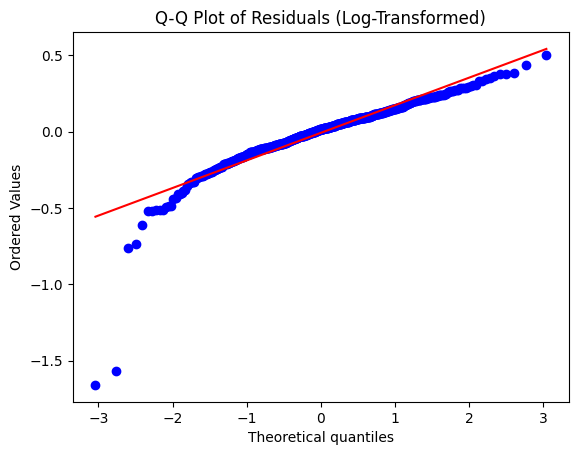

In [14]:
residuals_log = y_test_log - y_pred_log
plt.figure()
stats.probplot(residuals_log, plot=plt)
plt.title('Q-Q Plot of Residuals (Log-Transformed)')
plt.show()

2 significant outliers present for low sale price homes, consider removal. Slight overall shape improvement from standard linear regression. 

181    -1.658383
1553   -1.569017
790    -0.762880
306    -0.735919
561    -0.612064
Name: SalePrice, dtype: float64


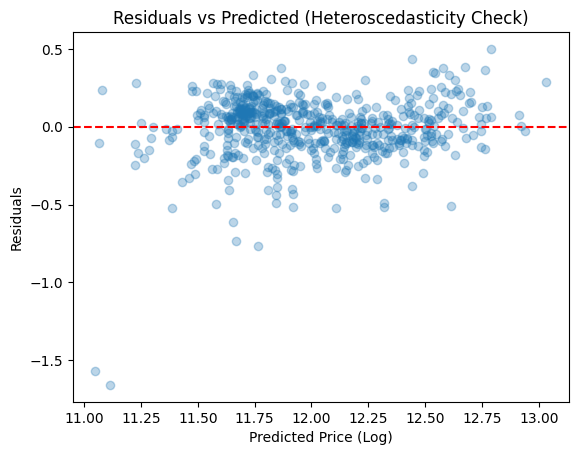

In [15]:

plt.figure()
plt.scatter(y_pred_log, residuals_log, alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Price (Log)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted (Heteroscedasticity Check)')

print(residuals_log.sort_values().head(5))

outlier_indices = residuals_log[residuals_log < -1.5].index
df = df.drop(outlier_indices)
#removing outliers

Outliers still present, overall shape much more random,

# Normality of residuals check - QQ - Log-Transformed - Outliers removed


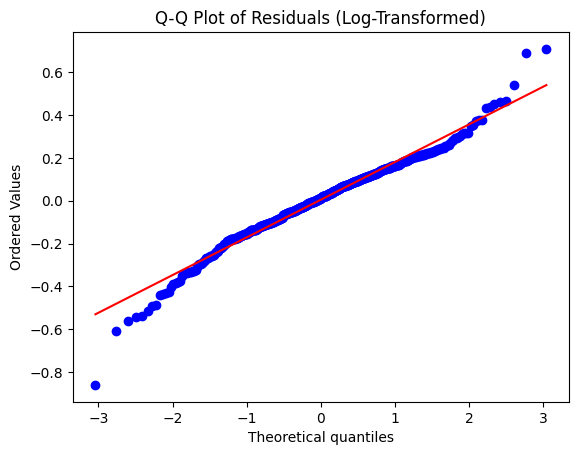

In [16]:
X_log = df[['Overall Qual', 'Gr Liv Area', 'Year Built']]
y_log = np.log(df['SalePrice'])

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=1)

log_lin_model = LinearRegression()
log_lin_model.fit(X_train_log, y_train_log)
y_pred_log = log_lin_model.predict(X_test_log)

residuals_log = y_test_log - y_pred_log
plt.figure()
stats.probplot(residuals_log, plot=plt)
plt.title('Q-Q Plot of Residuals (Log-Transformed)')
plt.show()

After transforming, have few significant outliers shown in the QQ Plot. However, generally better than the previous. 

# Heteroscedasticity Check - Log-Transformed - Outliers Removed

Text(0.5, 1.0, 'Residuals vs Predicted (Heteroscedasticity Check)')

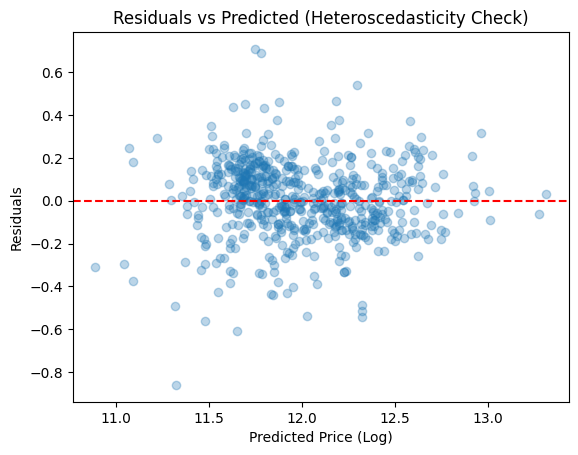

In [17]:

plt.figure()
plt.scatter(y_pred_log, residuals_log, alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Price (Log)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted (Heteroscedasticity Check)')


After transforming, residuals generally look much more randomly distributed.Our heteroscedasticity violation from the first model is corrected.

# Collinearity Test

In [18]:
X_with_const_log = X_train_log.copy()
X_with_const_log['const'] = 1

for i, col in enumerate(X_with_const_log.columns):
    print(f'{col} VIF: {variance_inflation_factor(X_with_const_log.values, i):.2f}')

Overall Qual VIF: 2.24
Gr Liv Area VIF: 1.49
Year Built VIF: 1.63
const VIF: 6417.94


After transformation, our VIF values for our 3 x variables are still very low. So we can safely conclude our variables are independent.

Text(0.5, 1.0, 'Actual Log Sale Price vs Predicted Log Sale Price')

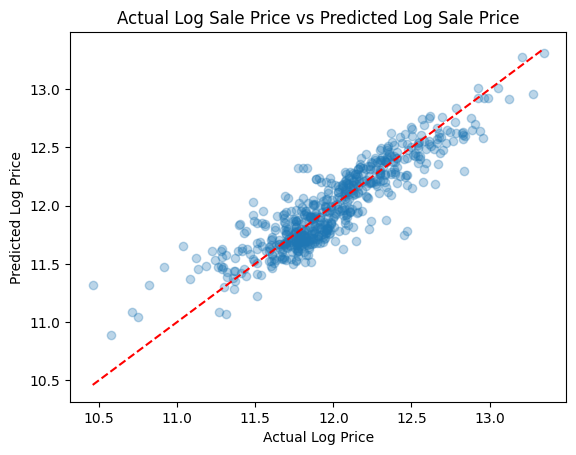

In [19]:
plt.figure()
plt.scatter(y_test_log, y_pred_log, alpha=0.3)
plt.plot([y_test_log.min(), y_test_log.max()], [y_test_log.min(), y_test_log.max()], 'r--')
plt.xlabel('Actual Log Price')
plt.ylabel('Predicted Log Price')
plt.title('Actual Log Sale Price vs Predicted Log Sale Price')

# Log-Transformed Multiple Linear Regression Summary Statistics

In [20]:
##### print("R\u00b2",r2_score(y_test_log,y_pred_log))
print('\nCoefficients:')
print(f'  Overall Qual: {log_lin_model.coef_[0]:,.4f} per unit increase')
print(f'  Gr Liv Area:  {log_lin_model.coef_[1]:,.6f} per sqft increase')
print(f'  Year Built:   {log_lin_model.coef_[2]:,.4f} per year increase')
print(f'  Intercept:    {log_lin_model.intercept_:,.2f}')
#
#In percentage terms:
for name, coef in zip(X_log.columns, log_lin_model.coef_):
    print(f'  {name}: {(np.exp(coef)-1)*100:.2f}% change per unit increase')


Coefficients:
  Overall Qual: 0.1306 per unit increase
  Gr Liv Area:  0.000329 per sqft increase
  Year Built:   0.0034 per year increase
  Intercept:    4.10
  Overall Qual: 13.95% change per unit increase
  Gr Liv Area: 0.03% change per unit increase
  Year Built: 0.34% change per unit increase


 # Log-Transformed Model Discussion

Our R$^{2}$ value is 0.805, meaning that about 81% of the variation in home price is explained by living area, quality and the year the house was constructed. This is 4% jump in our R$^{2}$. Our coefficient for Quality is 0.1306. Each one-point increase in quality is associated with a 13.95% increase** in sale price.

Our coefficient for living area is 0.000329. Similarly, this can be interpreted as the expected percentage change in sales price for each sq. ft. increase in the living area. However, we can express this change in terms of 100 sq ft., multiplying our result by 100 gives us this at 0.0329. Doing so allows us to more easily interpret these results once we convert this coefficient to a percentage. 

Our coefficient for Year Built is 0.0034. Again, this is the percentage increase from each additional year, with newer homes being more expensive. Our intercept has no practical interepretation in this model.

Typically, using a log-transformed model can negatively impact the interpretability of the report. But in this case, it doesn't as our model is fairly straight-forward. Furthermore, we obtained the added benefit of achieving our regression assumptions. 

We did remove a few outliers to help us achieve this. Some prior to the fitting of any model (sq ft > 4000, to eliminate extremely high-end) and some based on the log model's residuals. It's important to acknowledge that these residuals may have ended up in the training set with a different state, and would've been included in our evaluation.

Upon investigation of these two points, one is a relatively small home built in 1902, on an arterial road. For context, the median age is 1979. The other home is at first glance, relatively normal, which implies that other, potentially locational variables, are contributing. 


## Model Comparison

| Model | R² | Coefficients |
|-------|-----|--------------|
| Linear | 0.77 | 2 (dollar terms) |
| Log-Transformed | 0.81 | 3 (% changes) |

## Key Findings

- **Overall Quality** is the strongest predictor of sale price
- The log-transformed model better satisfies regression assumptions
- ~19% of variance remains unexplained, likely driven by location

## Future Improvements

- Include neighborhood as a categorical variable
- Cross-validate against other model iterations to account for sampling variability
- Run formal diagnostic tests for regression assumptions:
  - **Shapiro-Wilk** for normality of residuals
  - **Breusch-Pagan** for homoscedasticity